In [3]:
from fastai.vision.all import *
import timm
from pathlib import Path
from google.colab import drive
drive.mount('/content/drive')
import sys
sys.path.append('/content/Endometrial-Hyperplasia')

Mounted at /content/drive


In [4]:
from EndoHypNet.scripts.balance_dataset import balance_dataset
from EndoHypNet.scripts.augmentations import AlbumentationsTransform, get_albumentations
from EndoHypNet.scripts.dataloaders import dataloaders
from EndoHypNet.training.train_resnet50 import train_model

In [5]:
DATA_DIR = Path('/content/drive/MyDrive/eh_classification')

In [6]:
balance_dataset = balance_dataset(DATA_DIR, strategy='oversample')

Original class counts: {'Normal Endometrium': 1333, 'Endometrial Hyperplasia': 798}
Balanced dataset saved to: /content/balanced_data


In [7]:
import os

dataset_path = '/content/balanced_data'

for class_name in os.listdir(dataset_path):
    class_path = os.path.join(dataset_path, class_name)

    if os.path.isdir(class_path):
        file_count = 0
        for entry in os.listdir(class_path):
            if os.path.isfile(os.path.join(class_path, entry)):
                file_count += 1
        print(f"Class: {class_name}, Number of files: {file_count}")

Class: Endometrial Hyperplasia, Number of files: 1333
Class: Normal Endometrium, Number of files: 1333


In [8]:
transforms = AlbumentationsTransform(get_albumentations())

In [9]:
dls = dataloaders(balance_dataset, transforms)

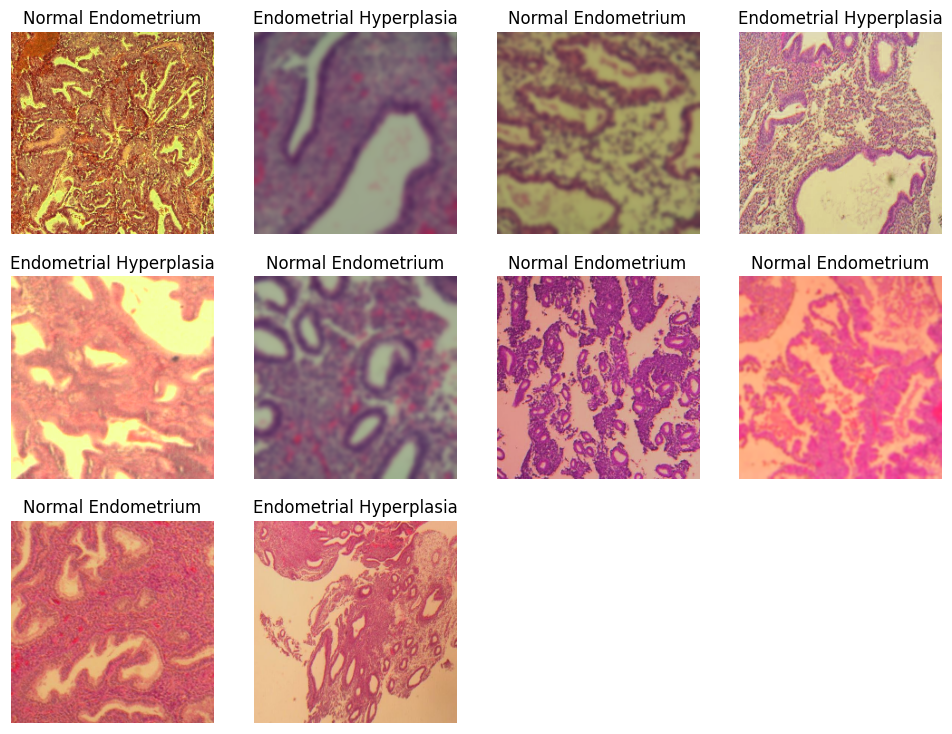

In [10]:
dls.show_batch(max_n=10)

In [ ]:
learn = train_model(dls)

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.001737800776027143)

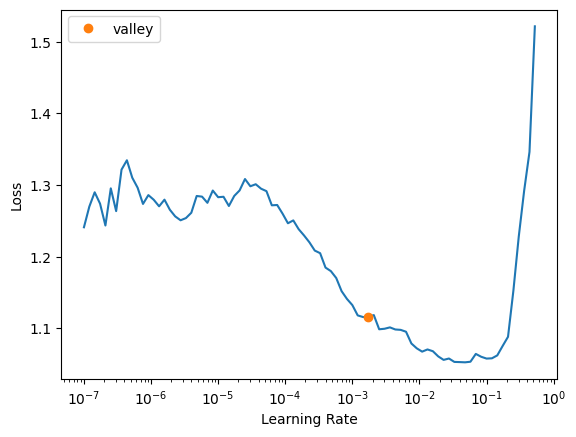

In [12]:
learn.lr_find()

In [13]:
learn.fit_one_cycle(20, lr_max = slice(1e-3, 1e-2))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.944263,0.595963,0.749064,0.753675,0.749064,0.747918,00:20
1,0.838085,0.631198,0.758427,0.760036,0.758427,0.758053,00:19
2,0.683311,0.516578,0.771536,0.772284,0.771536,0.771378,00:18
3,0.621158,0.489544,0.769663,0.769970,0.769663,0.769597,00:21
4,0.597494,0.551550,0.782772,0.785075,0.782772,0.782332,00:18
5,0.562957,0.541314,0.790262,0.790850,0.790262,0.790156,00:20
6,0.552443,0.523749,0.803371,0.803579,0.803371,0.803337,00:19
7,0.524344,0.414688,0.825843,0.829733,0.825843,0.825328,00:18
8,0.482213,0.448463,0.829588,0.830930,0.829588,0.829415,00:20
9,0.468251,0.428503,0.823970,0.824863,0.823970,0.823849,00:18


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0002290867705596611)

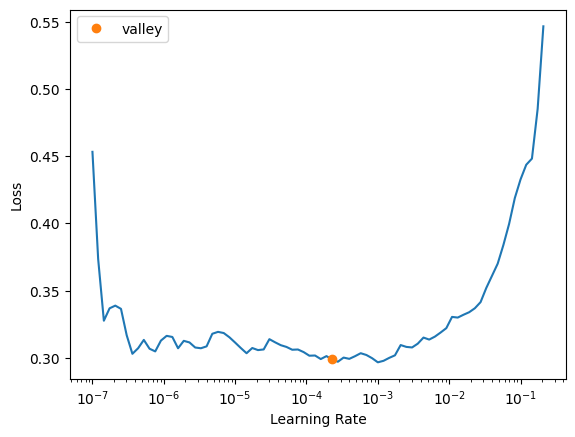

In [14]:
learn.unfreeze()
learn.lr_find()

In [15]:
learn.fit_one_cycle(20, lr_max = slice(1e-4, 1e-3))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.313779,0.331403,0.865169,0.865353,0.865169,0.865152,00:19
1,0.298891,0.304281,0.870786,0.870833,0.870787,0.870782,00:20
2,0.287295,0.393006,0.857678,0.857999,0.857678,0.857646,00:20
3,0.295062,0.332219,0.863296,0.863546,0.863296,0.863272,00:19
4,0.296080,0.322638,0.844569,0.844961,0.844569,0.844525,00:20
5,0.292923,0.317287,0.872659,0.872847,0.872659,0.872643,00:19
6,0.289886,0.296452,0.878277,0.878707,0.878277,0.878243,00:20
7,0.283328,0.303578,0.889513,0.889519,0.889513,0.889513,00:20
8,0.270562,0.290880,0.878277,0.878537,0.878277,0.878256,00:19
9,0.263291,0.289046,0.882023,0.882457,0.882022,0.881989,00:20


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0005754399462603033)

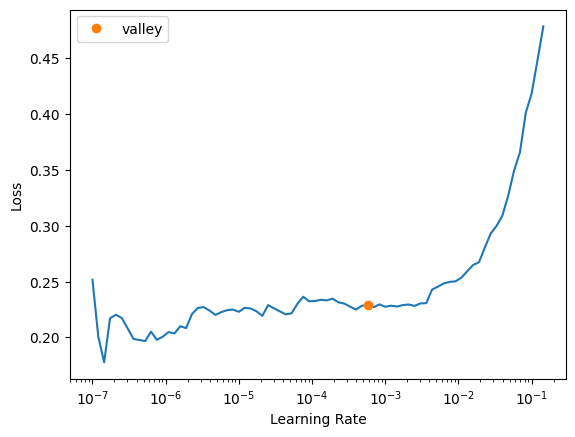

In [16]:
learn.unfreeze()
learn.lr_find()

In [17]:
learn.fit_one_cycle(20, lr_max = slice(1e-4, 1e-3))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.218050,0.238704,0.893258,0.893308,0.893258,0.893255,00:19
1,0.215292,0.249792,0.897004,0.897054,0.897004,0.897000,00:21
2,0.222102,0.234850,0.913858,0.913881,0.913858,0.913856,00:19
3,0.212308,0.256616,0.889513,0.889781,0.889513,0.889494,00:20
4,0.206802,0.230521,0.917603,0.917697,0.917603,0.917598,00:20
5,0.203675,0.242329,0.891386,0.891474,0.891386,0.891380,00:19
6,0.208194,0.251665,0.908240,0.908291,0.908240,0.908237,00:20
7,0.206836,0.238234,0.898876,0.898899,0.898876,0.898875,00:19
8,0.201563,0.228526,0.887640,0.887640,0.887640,0.887640,00:20
9,0.197867,0.232135,0.913858,0.913881,0.913858,0.913856,00:19


/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


SuggestedLRs(valley=0.0002290867705596611)

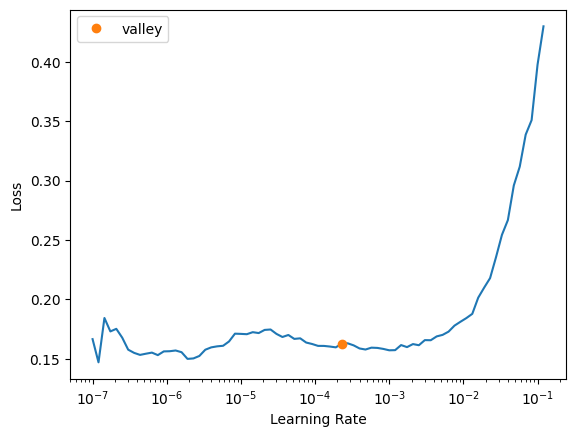

In [18]:
learn.unfreeze()
learn.lr_find()

In [19]:
learn.fit_one_cycle(20, lr_max = slice(1e-4, 1e-3))

/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.autocast(args...)` is deprecated. Please use `torch.amp.autocast('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()
/usr/local/lib/python3.11/dist-packages/fastai/callback/fp16.py:47: FutureWarning: `torch.cuda.amp.GradScaler(args...)` is deprecated. Please use `torch.amp.GradScaler('cuda', args...)` instead.
  self.autocast,self.learn.scaler,self.scales = autocast(dtype=dtype),GradScaler(**self.kwargs),L()


epoch,train_loss,valid_loss,accuracy,precision_score,recall_score,f1_score,time
0,0.155047,0.203640,0.917603,0.917626,0.917603,0.917602,00:20
1,0.154914,0.218243,0.906367,0.906390,0.906367,0.906366,00:21
2,0.159780,0.207495,0.919476,0.919529,0.919476,0.919473,00:19
3,0.173535,0.209224,0.915730,0.915783,0.915730,0.915728,00:19
4,0.171494,0.209063,0.917603,0.917978,0.917603,0.917584,00:20
5,0.167269,0.194169,0.913858,0.913951,0.913858,0.913853,00:19
6,0.177648,0.209121,0.923221,0.923227,0.923221,0.923221,00:20
7,0.164587,0.208598,0.910112,0.910204,0.910112,0.910107,00:19
8,0.162145,0.219682,0.911985,0.912037,0.911985,0.911982,00:21
9,0.156824,0.254165,0.919476,0.919529,0.919476,0.919473,00:19


In [20]:
learn.export(fname='mobilenet_v5.pkl')